### 1) Importing required modules

In [1]:
import  pandas                   as      pd
import  numpy                    as      np
from    sklearn.model_selection  import  train_test_split
from    sklearn.linear_model     import  LogisticRegression
from    sklearn.metrics          import  accuracy_score, roc_auc_score

from    matplotlib               import  pyplot   as  plt

In [2]:
import time
from    datetime   import datetime
from    datetime   import timedelta

### 2) Read data

In [3]:
df            =    pd.read_csv(r'D:\DrPKV\20220901\Output_20220901092149AM\imputed_compact_dataset_10_20220901092150AM.csv')

In [4]:
drop_cols     =    [ 'Slno', 'Shareholderquity_code']
df1           =     df.drop(drop_cols, axis = 1)  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cash_ratio                      9000 non-null   float64
 1   Changeinsales_Industry          9000 non-null   float64
 2   debt_equity                     9000 non-null   float64
 3   debt_income                     9000 non-null   float64
 4   Interest_coverage               9000 non-null   float64
 5   Operating Cash Flow/Total Debt  9000 non-null   float64
 6   Receivable_turnover(new)        9000 non-null   float64
 7   ROS(new)                        9000 non-null   float64
 8   Total shareholders' funds       9000 non-null   float64
 9   Target                          9000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 703.2 KB


In [5]:
y             =    df1['Target']
X             =    df1.drop(['Target'], axis = 1)  

In [6]:
file_name     =    R'D:\DrPKV\20220901\Data\BankruptcyData.xlsx'
df_raw        =    pd.read_excel(file_name, sheet_name = 'Full data')
df_raw.shape

(9000, 34)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Row                                       9000 non-null   int64  
 1   Year                                      9000 non-null   int64  
 2   Company_name                              9000 non-null   object 
 3   Year Encoded                              9000 non-null   int64  
 4    Dummy Coded :Healthy=1; NPA= 0           9000 non-null   int64  
 5   Asset_turnover                            8299 non-null   float64
 6   Receivable_turnover(new)                  7390 non-null   float64
 7   Inventory_turnover                        5702 non-null   float64
 8   Cash_ratio                                8278 non-null   float64
 9   Quick_ratio                               8278 non-null   float64
 10  Current_ratio                       

In [8]:
df_raw.isnull().sum()

Row                                            0
Year                                           0
Company_name                                   0
Year Encoded                                   0
 Dummy Coded :Healthy=1; NPA= 0                0
Asset_turnover                               701
Receivable_turnover(new)                    1610
Inventory_turnover                          3298
Cash_ratio                                   722
Quick_ratio                                  722
Current_ratio                                722
ROA(new)                                     681
ROE(new)                                     699
ROS(new)                                     580
ROI(new)                                    4132
debt_asset                                   681
debt_equity                                  699
debt_income                                  118
Interest_coverage                           1569
Asset_coverage                              1306
EBIT_Sales          

In [9]:
df_raw.shape

(9000, 34)

In [10]:
df_compare                      =   df_raw.loc[:, [' Dummy Coded :Healthy=1; NPA= 0', 'Shareholderquity_code']]

In [11]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0    Dummy Coded :Healthy=1; NPA= 0  9000 non-null   int64  
 1   Shareholderquity_code            5210 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 140.8 KB


In [12]:
df_compare.isnull().sum()

 Dummy Coded :Healthy=1; NPA= 0       0
Shareholderquity_code              3790
dtype: int64

In [13]:
df_compare.dropna(inplace = True)

In [14]:
df_compare.shape

(5210, 2)

In [15]:
df_compare['Target']                 =  df_compare[' Dummy Coded :Healthy=1; NPA= 0'].astype(str)
df_compare['Shareholderquity_code']  =  df_compare['Shareholderquity_code'].astype(str) 

In [16]:
df_compare['Target'].value_counts()

1    3906
0    1304
Name: Target, dtype: int64

In [17]:
df_compare['Shareholderquity_code'].value_counts()

0.0    3305
2.0     865
1.0     601
3.0     439
Name: Shareholderquity_code, dtype: int64

In [18]:
df_compare['Target']                 =  df_compare['Target'].map({'0':'NPA','1':'Healthy', np.nan:'NY'},na_action = None)
df_compare['Shareholderquity_code']  =  df_compare['Shareholderquity_code'].map({'0.0':'healthy firm +ve equity',\
                                                                                 '1.0':'healthy firm -ve equity',\
                                                                                 '2.0':'banktrupt firm +ve equity',\
                                                                                 '3.0':'banktrupt firm -ve equity',\
                                                                                 np.nan:'NY'},na_action = None)

In [19]:
df_compare['Target'].value_counts()

Healthy    3906
NPA        1304
Name: Target, dtype: int64

In [20]:
df_compare['Shareholderquity_code'].value_counts()

healthy firm +ve equity      3305
banktrupt firm +ve equity     865
healthy firm -ve equity       601
banktrupt firm -ve equity     439
Name: Shareholderquity_code, dtype: int64

In [21]:
import scipy.stats
from   scipy.stats import chi2

In [22]:
ct_table_ind=pd.crosstab(df_compare['Target'], df_compare['Shareholderquity_code'])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 Shareholderquity_code  banktrupt firm +ve equity  banktrupt firm -ve equity  \
Target                                                                        
Healthy                                        0                          0   
NPA                                          865                        439   

Shareholderquity_code  healthy firm +ve equity  healthy firm -ve equity  
Target                                                                   
Healthy                                   3305                      601  
NPA                                          0                        0  


## Chi-square of independence

A Chi-Square test of independence uses the following null and alternative hypotheses:

**H0: (null hypothesis) The two variables, Target & Shareholderquity_code are independent.**

**H1: (alternative hypothesis) The two variables, Target & Shareholderquity_code are not independent. (i.e. they are associated)**

In [23]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)


chi2 statistic:     5210
p-value:            0
degrees of freedom: 3
expected frequencies:
 [[ 648.50095969  329.12360845 2477.79846449  450.57696737]
 [ 216.49904031  109.87639155  827.20153551  150.42303263]]


### Observations

Since the p-value for the Chi-square test of independence is < 0.05 (@ 5% level of significance), we have sufficient evidence to reject the null hypothesis and conclude that both **the two variables, Target & Shareholderquity_code are not independent. (i.e. they are associated).**

### 3) Implementing cross validation

In [24]:
"""
Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(random_state, X, y):  

    ### To compare algorithms
    
    from    matplotlib                    import   pyplot                 as       plt
    from    sklearn.model_selection       import   KFold
    from    sklearn.metrics               import   roc_auc_score
    from    sklearn.linear_model          import   LogisticRegression
    from    sklearn.tree                  import   DecisionTreeClassifier
    from    sklearn.discriminant_analysis import   LinearDiscriminantAnalysis
    from    sklearn.model_selection       import   cross_val_score
    from    sklearn.neighbors             import   KNeighborsClassifier
    from    sklearn.ensemble              import   RandomForestClassifier
    from    sklearn.model_selection       import   StratifiedKFold
    from    xgboost                       import   XGBClassifier
    ### ----------------------------------------------------------------------------------------------    
    ### Prepare models
    ### ----------------------------------------------------------------------------------------------
    
    ## X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, stratify = y,  random_state = random_state)  
        
    results_df   =   pd.DataFrame()  
    models       =   []
    models.append(('LR', LogisticRegression().fit(X, y)))
    models.append(('CART', DecisionTreeClassifier().fit(X, y)))
    models.append(('RF',RandomForestClassifier().fit(X, y)))
    models.append(('LDA', LinearDiscriminantAnalysis().fit(X, y)))
    models.append(('KNN', KNeighborsClassifier().fit(X, y)))
    models.append(('XGB', XGBClassifier().fit(X, y)))
    
    ### ----------------------------------------------------------------------------------------------   
    ### Evaluate model in turn
      
    scores_req      =  ['roc_auc', 'precision', 'recall']
    n_splits        =  10
    cv_df           =  pd.DataFrame()
    
    for i in range(len(scores_req)):
        
        results    =  []
        scoring    =  scores_req[i]
        names      =  []
        
        print(scoring)
        
        for name, model in models:
                print("\n n_splits %d" % (n_splits))        
                #try:
                strat_cv        =   StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 1234)
                cv_results      =   cross_val_score(model, X, y, cv = strat_cv, scoring = scoring)
                results.append(cv_results)
                names.append(name)
                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                print(msg)
                cv_df1           =  pd.DataFrame({'Model' : name, 'Scoring' : scoring, 'Measure value' : cv_results.mean()} , index = [0])
                cv_df            =  pd.concat([cv_df, cv_df1], ignore_index = True)
                
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()
    return cv_df
### ------------------------------------------------------------------------------------------

roc_auc

 n_splits 10
LR: 0.671746 (0.014772)

 n_splits 10
CART: 0.753718 (0.024503)

 n_splits 10
RF: 0.936049 (0.008508)

 n_splits 10
LDA: 0.687096 (0.017257)

 n_splits 10
KNN: 0.687889 (0.015021)

 n_splits 10
XGB: 0.944597 (0.008113)


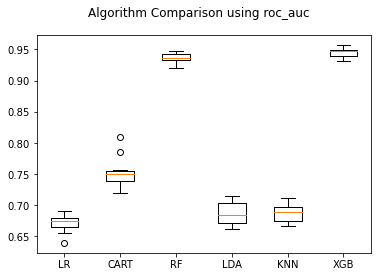

precision

 n_splits 10
LR: 0.347486 (0.042022)

 n_splits 10
CART: 0.565580 (0.024578)

 n_splits 10
RF: 0.879763 (0.036222)

 n_splits 10
LDA: 0.592857 (0.438050)

 n_splits 10


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN: 0.630005 (0.066139)

 n_splits 10
XGB: 0.829587 (0.033946)


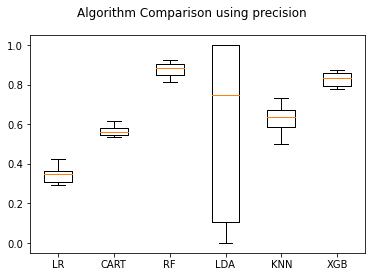

recall

 n_splits 10
LR: 0.242293 (0.024252)

 n_splits 10
CART: 0.581955 (0.043587)

 n_splits 10
RF: 0.525404 (0.058182)

 n_splits 10
LDA: 0.009062 (0.008133)

 n_splits 10
KNN: 0.274032 (0.027480)

 n_splits 10
XGB: 0.597032 (0.052582)


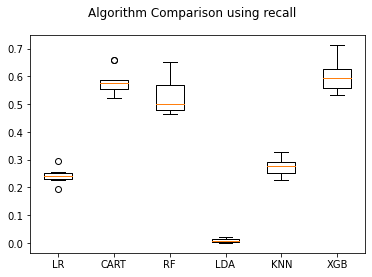

In [25]:
random_state         =   12345
cv_df =  compare_models(random_state, X, y)

In [26]:
cv_df

,Model,Scoring,Measure value
0,LR,roc_auc,0.671746
1,CART,roc_auc,0.753718
2,RF,roc_auc,0.936049
3,LDA,roc_auc,0.687096
4,KNN,roc_auc,0.687889
5,XGB,roc_auc,0.944597
6,LR,precision,0.347486
7,CART,precision,0.565580
8,RF,precision,0.879763
9,LDA,precision,0.592857
